In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sopon\OneDrive\telecom.csv")

In [3]:
df.columns

Index(['Bearer Id', ' Start', ' Start ms', ' End', ' End ms', ' Dur. (ms)',
       ' IMSI', ' MSISDN/Number', ' IMEI', ' Last Location Name',
       ' Avg RTT DL (ms)', ' Avg RTT UL (ms)', ' Avg Bearer TP DL (kbps)',
       ' Avg Bearer TP UL (kbps)', ' TCP DL Retrans. Vol (Bytes)',
       ' TCP UL Retrans. Vol (Bytes)', ' DL TP < 50 Kbps (%)',
       ' 50 Kbps < DL TP < 250 Kbps (%)', ' 250 Kbps < DL TP < 1 Mbps (%)',
       ' DL TP > 1 Mbps (%)', ' UL TP < 10 Kbps (%)',
       ' 10 Kbps < UL TP < 50 Kbps (%)', ' 50 Kbps < UL TP < 300 Kbps (%)',
       ' UL TP > 300 Kbps (%)', ' HTTP DL (Bytes)', ' HTTP UL (Bytes)',
       ' Activity Duration DL (ms)', ' Activity Duration UL (ms)',
       ' Dur. (ms).1', ' Handset Manufacturer', ' Handset Type',
       ' Nb of sec with 125000B < Vol DL',
       ' Nb of sec with 1250B < Vol UL < 6250B',
       ' Nb of sec with 31250B < Vol DL < 125000B',
       ' Nb of sec with 37500B < Vol UL',
       ' Nb of sec with 6250B < Vol DL < 31250B',
       

In [4]:
numeric_data = df.select_dtypes(include=[np.number])
mean_value = numeric_data.mean()
numeric_data.fillna(value=mean_value, inplace=True)

In [5]:
numeric_data[' IMSI'].nunique()

9

Top 10 customers per Sessions Frequency

In [6]:
session_counts = numeric_data.groupby(' MSISDN/Number')['Bearer Id'].count()

In [7]:
top_sessions = session_counts.sort_values(ascending=False).head(10)

In [8]:
top_sessions

 MSISDN/Number
4.188282e+10    1165
3.362632e+10      18
3.362578e+10      17
3.361489e+10      17
3.365973e+10      16
3.367588e+10      15
3.376054e+10      15
3.366716e+10      13
3.360452e+10      12
3.362708e+10      12
Name: Bearer Id, dtype: int64

Top 10 customers per Average duration

In [9]:
average_duration = numeric_data.groupby(' MSISDN/Number')[' Dur. (ms)'].mean()

In [10]:
top_duration = average_duration.sort_values(ascending=False).head(10)

In [11]:
top_duration

 MSISDN/Number
3.366926e+10    1573420.0
3.366172e+10    1480875.0
3.360750e+10    1474663.0
3.376260e+10    1375612.0
3.376063e+10    1361762.0
3.376167e+10    1357643.0
3.375034e+10    1321509.0
3.366682e+10    1299381.0
3.369870e+10    1209607.0
3.363050e+10    1177517.0
Name:  Dur. (ms), dtype: float64

Top 10 customers per Sessions total traffic

In [12]:
numeric_data['Traffic (Bytes)'] = numeric_data[' Total UL (Bytes)'] + numeric_data[' Total DL (Bytes)']

In [13]:
total_traffic = numeric_data.groupby(' MSISDN/Number')['Traffic (Bytes)'].sum()

In [14]:
top_traffic = total_traffic.sort_values(ascending=False).head(10)

In [15]:
top_traffic

 MSISDN/Number
4.188282e+10    5.808254e+11
3.361489e+10    8.846226e+09
3.376054e+10    8.514774e+09
3.362578e+10    8.499621e+09
3.362632e+10    7.971167e+09
3.367588e+10    7.891111e+09
3.365973e+10    7.705863e+09
3.366646e+10    7.308501e+09
3.376041e+10    7.132371e+09
3.366471e+10    6.872018e+09
Name: Traffic (Bytes), dtype: float64

Aggregated Data

In [16]:
numeric_data[' MSISDN/Number'].nunique()

106857

In [17]:
aggregated_data = numeric_data.groupby(' MSISDN/Number').agg(
    Session_Frequency=('Bearer Id', 'count'),
    Average_Session_Duration=(' Dur. (ms)', 'mean'),
    Total_Traffic=('Traffic (Bytes)', 'sum')
).reset_index()

In [18]:
aggregated_data.head(10)

,MSISDN/Number,Session_Frequency,Average_Session_Duration,Total_Traffic
0,3.360100e+10,1,116720.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,18552.0,1.457411e+09
5,3.360101e+10,2,126991.5,6.152172e+08
6,3.360101e+10,2,64180.0,6.547231e+08
7,3.360101e+10,1,86399.0,3.326604e+08
8,3.360101e+10,2,247851.0,9.901322e+08
9,3.360102e+10,1,124854.0,7.324638e+08


Normalization and classification into clusters

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
features = ['Session_Frequency', 'Average_Session_Duration', 'Total_Traffic']
scaler = StandardScaler()
df_normalized = scaler.fit_transform(aggregated_data[features])

In [21]:
df_normalized = pd.DataFrame(df_normalized, columns=features)

Minimum, maximum, average & total non-normalized metrics for each cluster.

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
aggregated_data['cluster'] = kmeans.fit_predict(df_normalized)

In [24]:
aggregated_data[[' MSISDN/Number', 'cluster']].head()

,MSISDN/Number,cluster
0,3.360100e+10,0
1,3.360100e+10,2
2,3.360100e+10,2
3,3.360101e+10,0
4,3.360101e+10,0


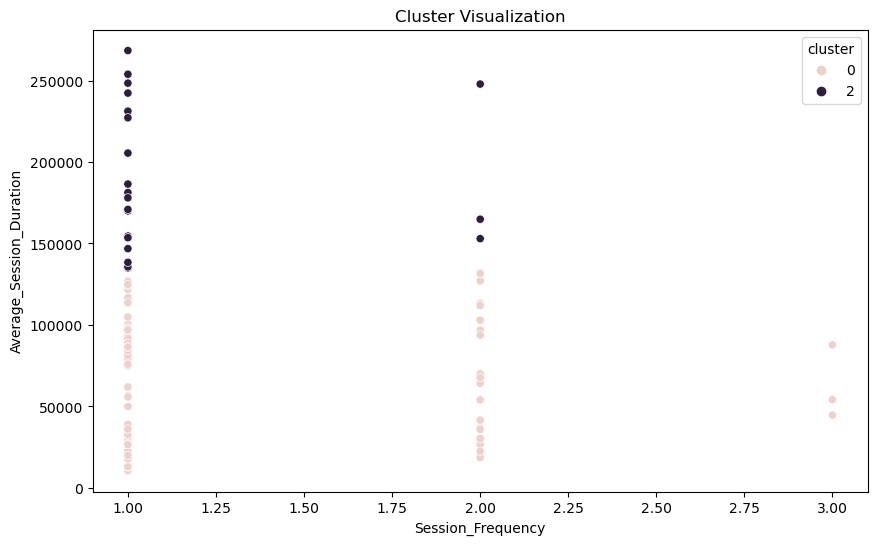

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(aggregated_data.head(100), x='Session_Frequency', y='Average_Session_Duration', hue='cluster')
plt.title('Cluster Visualization')
plt.show()

In [26]:
cluster_stats = aggregated_data.groupby('cluster').agg({
    'Session_Frequency': ['min', 'max', 'mean', 'sum'],
    'Average_Session_Duration': ['min', 'max', 'mean', 'sum'],
    'Total_Traffic': ['min', 'max', 'mean', 'sum']
})

In [27]:
cluster_stats

Session_Frequency                            Average_Session_Duration  \
                      min   max         mean     sum                      min   
cluster                                                                         
0                       1    11     1.404872  111308              7142.000000   
1                    1165  1165  1165.000000    1165             71165.023206   
2                       1    18     1.362014   37627            131748.000000   

                                                   Total_Traffic  \
                  max           mean           sum           min   
cluster                                                            
0        1.324918e+05   71622.976827  5.674688e+09  3.324901e+07   
1        7.116502e+04   71165.023206  7.116502e+04  5.808254e+11   
2        1.573420e+06  191807.413905  5.298872e+09  3.357584e+07   

                                                   
                  max          mean           sum  
cluster                                            
0        5.096129e+09  6.961693e+08  5.515749e+13  
1        5.808254e+11  5.808254e+11  5.808254e+11  
2        8.846226e+09  6.760281e+08  1.867595e+13

In [28]:
aggregated_data.describe().round(0)

,MSISDN/Number,Session_Frequency,Average_Session_Duration,Total_Traffic,cluster
count,1.068570e+05,106857.0,106857.0,1.068570e+05,106857.0
mean,4.511471e+10,1.0,102695.0,6.963912e+08,1.0
std,2.889410e+12,4.0,72247.0,1.841392e+09,1.0
min,3.360100e+10,1.0,7142.0,3.324901e+07,0.0
25%,3.365088e+10,1.0,56410.0,3.585530e+08,0.0
50%,3.366365e+10,1.0,86400.0,6.179232e+08,0.0
75%,3.368344e+10,2.0,133912.0,8.574358e+08,2.0
max,8.823970e+14,1165.0,1573420.0,5.808254e+11,2.0


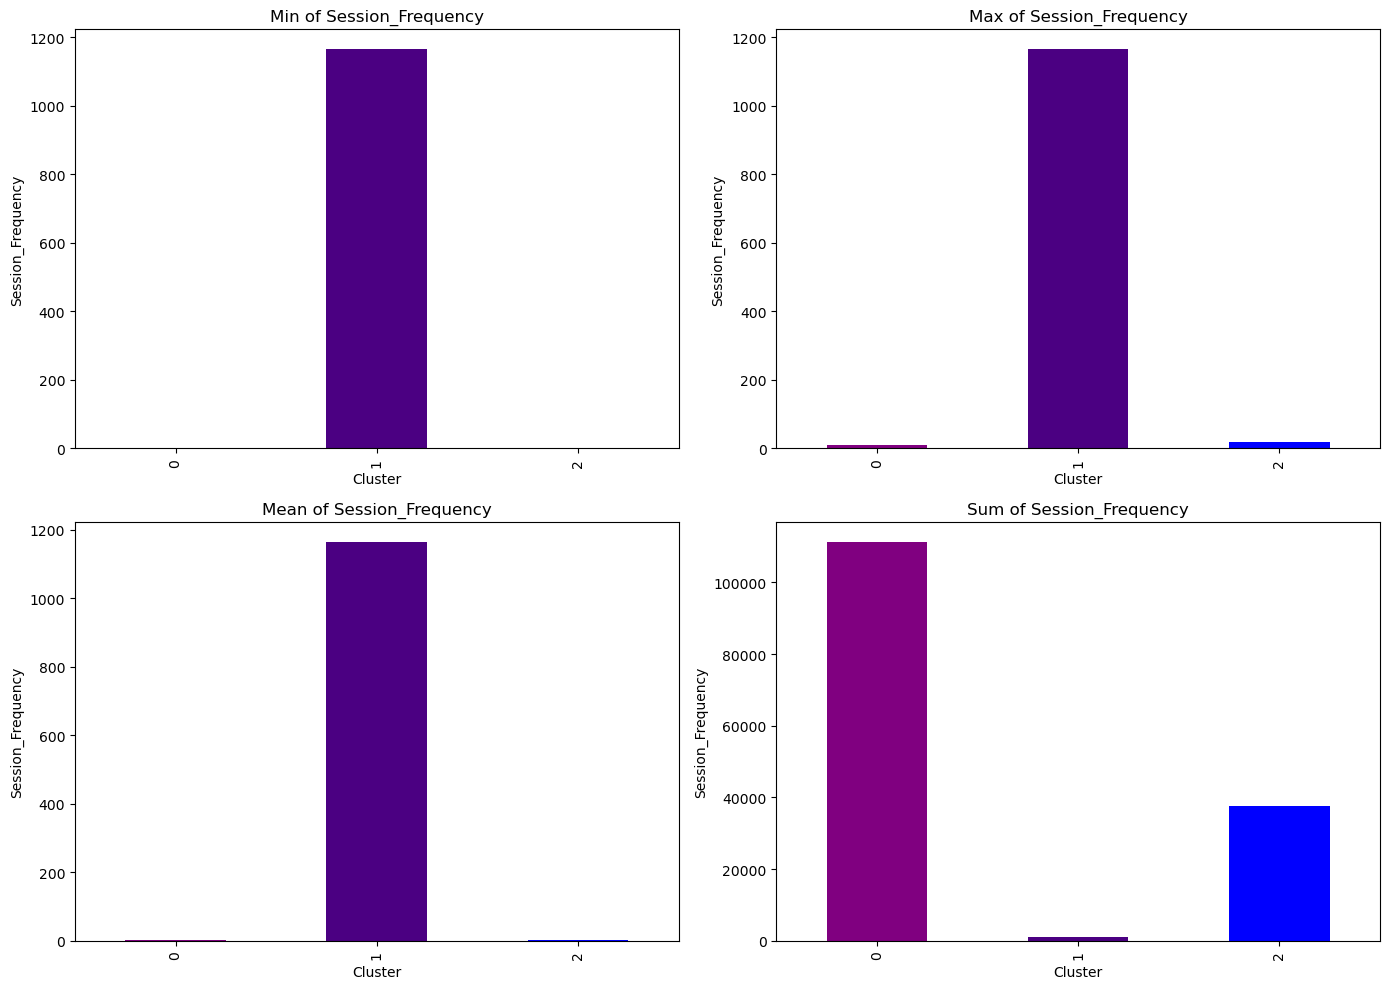

In [29]:
def plot_cluster_stats(cluster_stats, metric):
    fig, ax = plt.subplots(2, 2, figsize=(14, 10))
    ax = ax.ravel()
    operations = ['min', 'max', 'mean', 'sum']
    for i, op in enumerate(operations):
        cluster_stats[metric][op].plot(kind='bar', ax=ax[i], color=['purple', 'indigo', 'blue'])
        ax[i].set_title(f'{op.capitalize()} of {metric}')
        ax[i].set_xlabel('Cluster')
        ax[i].set_ylabel(metric)
    plt.tight_layout()
    plt.show()

plot_cluster_stats(cluster_stats, 'Session_Frequency')

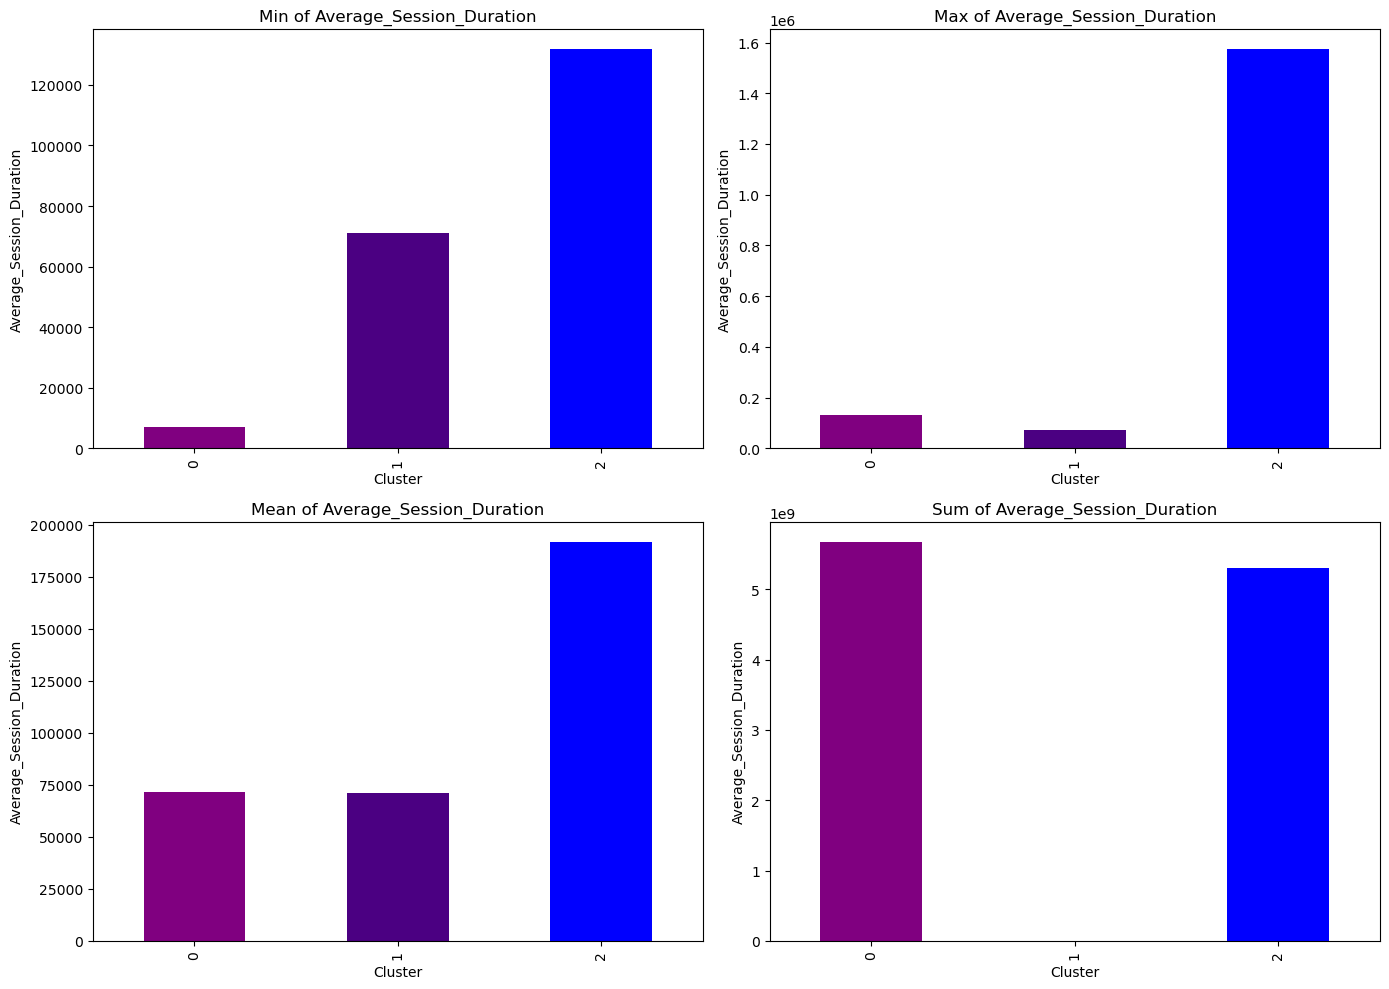

In [30]:
plot_cluster_stats(cluster_stats, 'Average_Session_Duration')


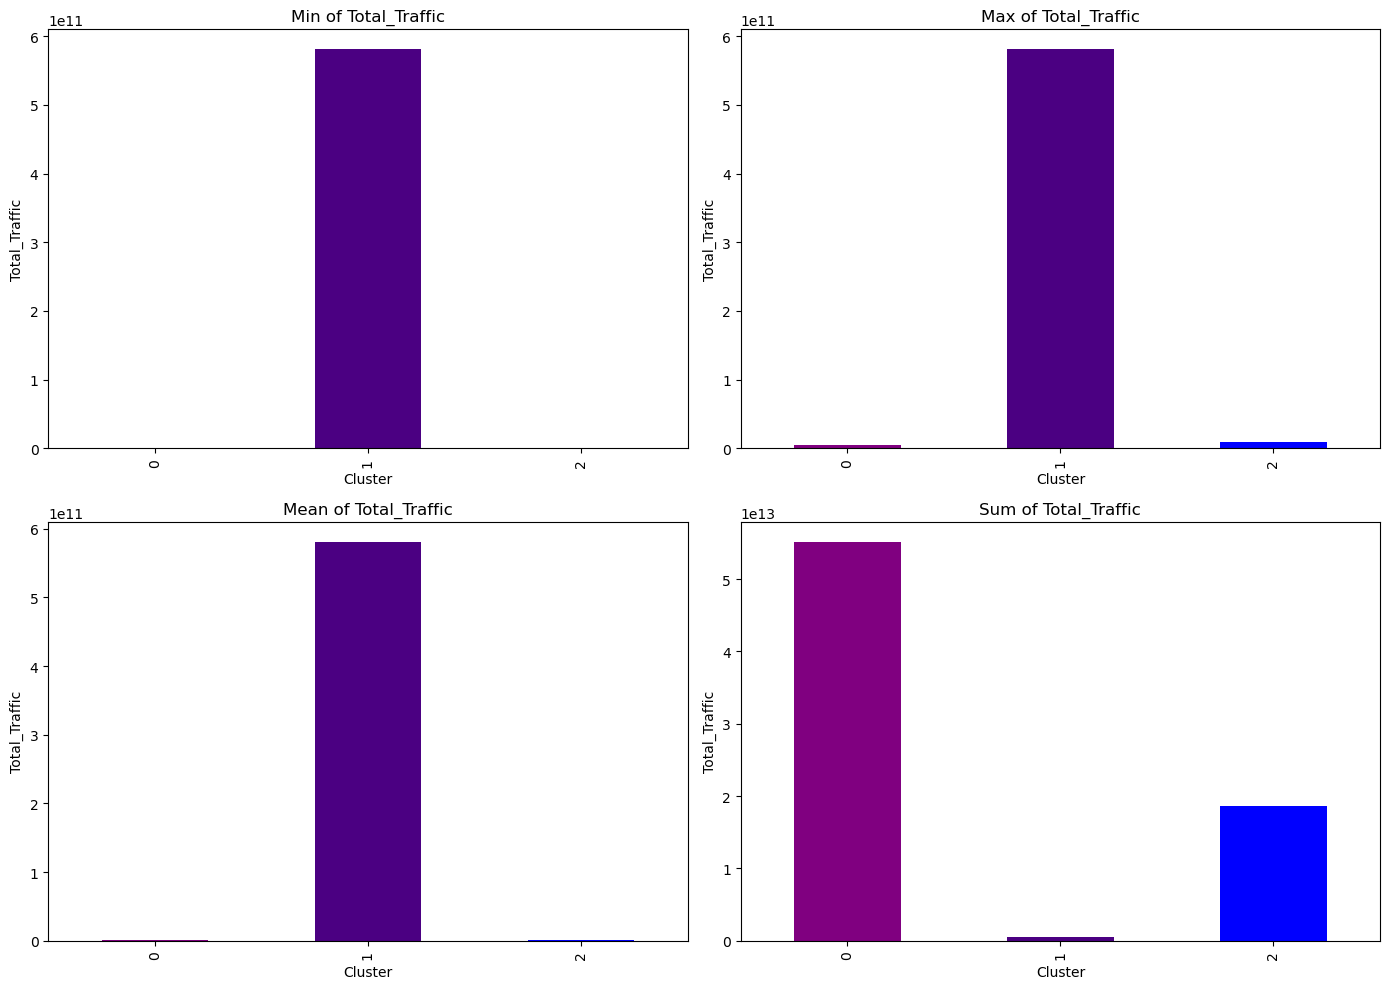

In [31]:
plot_cluster_stats(cluster_stats, 'Total_Traffic')

Top 10 most engaged users per application


In [32]:
numeric_data.columns

Index(['Bearer Id', ' Start ms', ' End ms', ' Dur. (ms)', ' IMSI',
       ' MSISDN/Number', ' IMEI', ' Avg Bearer TP DL (kbps)',
       ' Avg Bearer TP UL (kbps)', ' Activity Duration DL (ms)',
       ' Activity Duration UL (ms)', ' Dur. (ms).1',
       ' Social Media DL (Bytes)', ' Social Media UL (Bytes)',
       ' Google DL (Bytes)', ' Google UL (Bytes)', ' Email DL (Bytes)',
       ' Email UL (Bytes)', ' Youtube DL (Bytes)', ' Youtube UL (Bytes)',
       ' Netflix DL (Bytes)', ' Netflix UL (Bytes)', ' Gaming DL (Bytes)',
       ' Gaming UL (Bytes)', ' Other DL (Bytes)', ' Other UL (Bytes)',
       ' Total UL (Bytes)', ' Total DL (Bytes)', 'Traffic (Bytes)'],
      dtype='object')

In [33]:
numeric_data['Social Media'] = numeric_data[' Social Media DL (Bytes)'] + numeric_data[' Social Media UL (Bytes)']
numeric_data['Google'] = numeric_data[' Google DL (Bytes)'] + numeric_data[' Google UL (Bytes)']
numeric_data['Email'] = numeric_data[' Email DL (Bytes)'] + numeric_data[' Email UL (Bytes)']
numeric_data['Youtube'] = numeric_data[' Youtube DL (Bytes)'] + numeric_data[' Youtube UL (Bytes)']
numeric_data[' Netflix'] = numeric_data[' Netflix DL (Bytes)'] + numeric_data[' Netflix UL (Bytes)']
numeric_data[' Gaming'] = numeric_data[' Gaming DL (Bytes)'] + numeric_data[' Gaming DL (Bytes)']
numeric_data['Other'] = numeric_data[' Other DL (Bytes)'] + numeric_data[' Other DL (Bytes)']

 Top 10 most engaged users in social media

In [34]:
socialtraffic_per_user = numeric_data.groupby(' MSISDN/Number') ['Social Media'].sum()

In [35]:
top_social_traffic = socialtraffic_per_user.sort_values(ascending=False).head(10)

In [36]:
top_social_traffic

 MSISDN/Number
4.188282e+10    2.154814e+09
3.362632e+10    4.337478e+07
3.376054e+10    3.978319e+07
3.365973e+10    3.541236e+07
3.361489e+10    2.829454e+07
3.362578e+10    2.713550e+07
3.366716e+10    2.424785e+07
3.378632e+10    2.397492e+07
3.366907e+10    2.380083e+07
3.360313e+10    2.307782e+07
Name: Social Media, dtype: float64

Top 10 most engaged users in google

In [37]:
googletraffic_per_user = numeric_data.groupby(' MSISDN/Number') ['Google'].sum()
top_google_traffic = googletraffic_per_user.sort_values(ascending=False).head(10)
top_google_traffic

 MSISDN/Number
4.188282e+10    9.021499e+09
3.362632e+10    1.521919e+08
3.362578e+10    1.423079e+08
3.361489e+10    1.279738e+08
3.376054e+10    1.232231e+08
3.365973e+10    1.165163e+08
3.378632e+10    1.102545e+08
3.367588e+10    1.098605e+08
3.366716e+10    1.050327e+08
3.376127e+10    9.708999e+07
Name: Google, dtype: float64

Top 10 most engaged users for email

In [38]:
emailtraffic_per_user = numeric_data.groupby(' MSISDN/Number') ['Email'].sum()
top_email_traffic = emailtraffic_per_user.sort_values(ascending=False).head(10)
top_email_traffic

 MSISDN/Number
4.188282e+10    2.623532e+09
3.362632e+10    4.241878e+07
3.361489e+10    4.078863e+07
3.362578e+10    4.063397e+07
3.378632e+10    3.631012e+07
3.365973e+10    3.599979e+07
3.376054e+10    3.369377e+07
3.367588e+10    3.151442e+07
3.366546e+10    3.041788e+07
3.366716e+10    3.033580e+07
Name: Email, dtype: float64

Top 10 most engaged users for youtube

In [39]:
youtubetraffic_per_user = numeric_data.groupby(' MSISDN/Number') ['Youtube'].sum()
top_youtube_traffic = youtubetraffic_per_user.sort_values(ascending=False).head(10)
top_youtube_traffic

 MSISDN/Number
4.188282e+10    2.658243e+10
3.362578e+10    4.529588e+08
3.376054e+10    3.962892e+08
3.361489e+10    3.943702e+08
3.362632e+10    3.744830e+08
3.367588e+10    3.174106e+08
3.366716e+10    3.152313e+08
3.362708e+10    3.087908e+08
3.376041e+10    3.031691e+08
3.369879e+10    3.026620e+08
Name: Youtube, dtype: float64

Top 10 most engaged users for netflix

In [40]:
netflixtraffic_per_user = numeric_data.groupby(' MSISDN/Number') [' Netflix'].sum()
top_netflix_traffic = netflixtraffic_per_user.sort_values(ascending=False).head(10)
top_netflix_traffic

 MSISDN/Number
4.188282e+10    2.649380e+10
3.365973e+10    3.995191e+08
3.361489e+10    3.614010e+08
3.362578e+10    3.569806e+08
3.376054e+10    3.346433e+08
3.362632e+10    3.287257e+08
3.376041e+10    3.183475e+08
3.366716e+10    3.139395e+08
3.367588e+10    3.090932e+08
3.378632e+10    3.059398e+08
Name:  Netflix, dtype: float64

Top 10 most engaged users for gaming

In [41]:
gamingtraffic_per_user = numeric_data.groupby(' MSISDN/Number') [' Gaming'].sum()
top_gaming_traffic = gamingtraffic_per_user.sort_values(ascending=False).head(10)
top_gaming_traffic

 MSISDN/Number
4.188282e+10    9.890548e+11
3.361489e+10    1.524407e+10
3.376054e+10    1.463273e+10
3.362578e+10    1.434377e+10
3.367588e+10    1.372661e+10
3.362632e+10    1.349147e+10
3.365973e+10    1.321980e+10
3.366646e+10    1.309266e+10
3.376041e+10    1.234189e+10
3.366471e+10    1.202712e+10
Name:  Gaming, dtype: float64

Top 10 most engaged users for other applications

In [42]:
othertraffic_per_user = numeric_data.groupby(' MSISDN/Number') ['Other'].sum()
top_other_traffic = othertraffic_per_user.sort_values(ascending=False).head(10)
top_other_traffic

 MSISDN/Number
4.188282e+10    9.672345e+11
3.362632e+10    1.605095e+10
3.361489e+10    1.499060e+10
3.367588e+10    1.333015e+10
3.360313e+10    1.244541e+10
3.362578e+10    1.240331e+10
3.365973e+10    1.236510e+10
3.362695e+10    1.045754e+10
3.362708e+10    1.007949e+10
3.376127e+10    9.995969e+09
Name: Other, dtype: float64

 Top 3 most used applications

Group users in engagement clusters based on Session_Frequency, Average_Session_Duration, Total_Traffic

In [43]:
squared_error = []
kmeans_kwargs= {
    'init':"k-means++",
    'n_init': 10,
    'max_iter': 300,
    'random_state':20  
}

In [44]:
for c in range(1, 11):
    kmeans = KMeans(n_clusters=c, **kmeans_kwargs)
    kmeans.fit(df_normalized)
    squared_error.append(kmeans.inertia_)

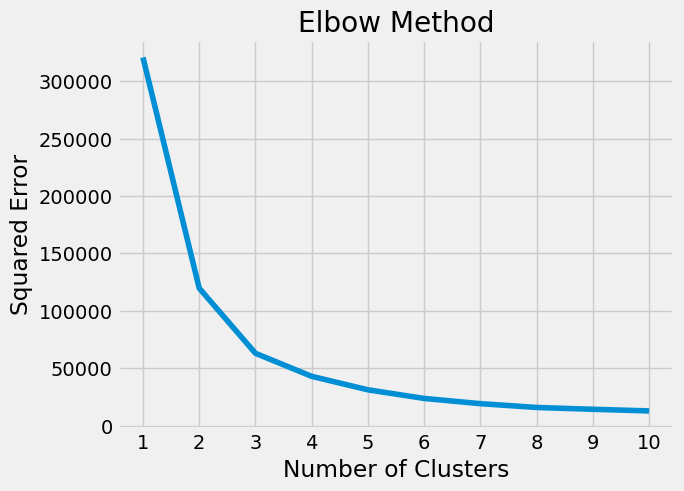

In [45]:
plt.style.use('fivethirtyeight')
plt.plot(range(1,11), squared_error)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Squared Error")
plt.title("Elbow Method")
plt.show()